Source: [National Combined YRBS data set, ACCESS format](https://www.cdc.gov/healthyyouth/data/yrbs/data.htm)

In ACCESS:
- deleted all data from before 2007 
- deleted all sample data except "year"
- deleted all demographic data except "bmi"


In [1]:
# dependencies
import pandas as pd

In [4]:
# read in National data
national = pd.read_csv("data/SADCQ.csv")
national.head()

,year,age,sex,race7,bmi,sexid,q8,q9,q10,q11,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,2017,5.0,2.0,6.0,18.048443,1.0,5.0,1.0,2.0,2.0,...,NaN,4.0,NaN,1.0,6.0,1.0,NaN,NaN,1.0,NaN
1,2017,5.0,2.0,3.0,30.483565,1.0,5.0,2.0,2.0,2.0,...,NaN,4.0,NaN,1.0,1.0,2.0,NaN,NaN,1.0,NaN
2,2017,5.0,2.0,2.0,14.664490,NaN,5.0,1.0,1.0,1.0,...,NaN,4.0,NaN,1.0,1.0,1.0,NaN,NaN,2.0,NaN
3,2017,5.0,2.0,7.0,20.893566,1.0,4.0,2.0,1.0,1.0,...,NaN,4.0,NaN,1.0,2.0,2.0,NaN,NaN,2.0,NaN
4,2017,5.0,2.0,4.0,NaN,1.0,5.0,1.0,NaN,NaN,...,NaN,8.0,NaN,1.0,1.0,2.0,NaN,NaN,2.0,NaN


In [9]:
# isolate survey data
qs = national.iloc[:, 4:].drop("sexid", axis=1)
qs.head()

,bmi,q8,q9,q10,q11,q12,q13,q14,q15,q16,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,18.048443,5.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,NaN,4.0,NaN,1.0,6.0,1.0,NaN,NaN,1.0,NaN
1,30.483565,5.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,NaN,4.0,NaN,1.0,1.0,2.0,NaN,NaN,1.0,NaN
2,14.664490,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,4.0,NaN,1.0,1.0,1.0,NaN,NaN,2.0,NaN
3,20.893566,4.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,...,NaN,4.0,NaN,1.0,2.0,2.0,NaN,NaN,2.0,NaN
4,NaN,5.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,8.0,NaN,1.0,1.0,2.0,NaN,NaN,2.0,NaN


In [11]:
# check some very rough correlation values
# getting ideas for interesting variables to explore in nb
c = qs.corr()

# outcome vars
tv = c["q80"]
elec = c["q81"]

tv.sort_values(ascending=True)

In [ ]:
# renaming columns for clarity
# and subsetting those used in the notebook

col_name_dic = {"q80": "tv use", "q80": "computer/video game use", "q76": "soda drinking",
               "q89": "grades", "q8":'seat belt use', 'qsunscreenuse':'sun screen use',
               'q25': 'depression'}

In [28]:
# playing with vis ideas around correlation
# all variables are ordinal, most have limited (<10) values
# spacing not always even (e.g. "0", "0-1", "1", "2", >2")
import seaborn as sns
clean = qs.loc[:, ['q80', 'q81']].dropna(axis=0)
clean.shape

(86859, 2)

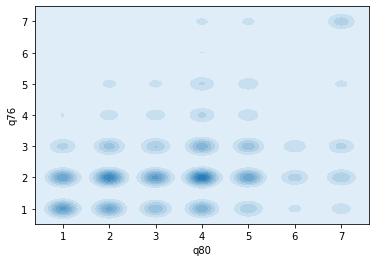

In [48]:
clean = qs.loc[:, ['q80', 'q76']].dropna()
sns.kdeplot(clean['q80'], clean['q76'], shade=True)

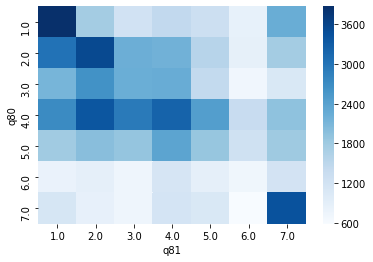

In [42]:
# yes I know I should have used groupby
sns.heatmap(pd.pivot_table(data=qs, values='q8', index='q80', columns='q81', aggfunc=len), cmap='Blues')

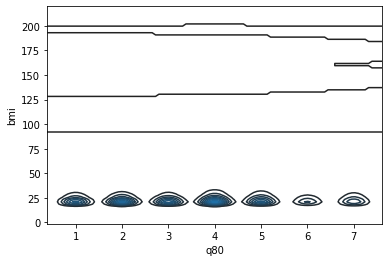

In [39]:
clean = qs.loc[:, ['q80', 'bmi']].dropna()
sns.kdeplot(clean['q80'], clean['bmi'])

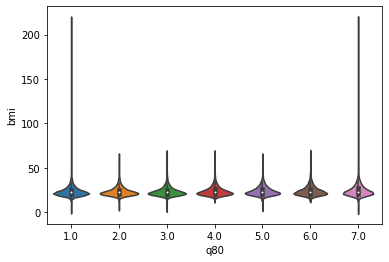

In [40]:
sns.violinplot(data=qs, x='q80', y='bmi')

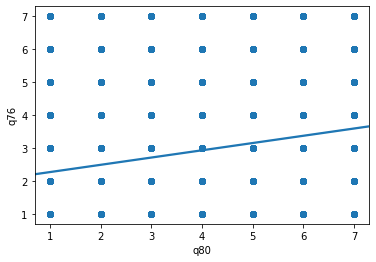

In [44]:
sns.regplot(data=qs, x='q80', y='q76')